# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


def kmeanTest(cluster,X):
    kmeans = KMeans(cluster, random_state=0)
    clusters=kmeans.fit(X)
    labels=clusters.fit_predict(X)
    silhouette_avg = silhouette_score(X,labels)

    return silhouette_avg,labels
num=8
score,_= kmeanTest(num,X)
print("For n_clusters =", num,"The average silhouette_score is :", score)

For n_clusters = 8 The average silhouette_score is : 0.5361427462305504


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [50]:
num=5
score,_= kmeanTest(num,X)
print("For n_clusters =", num,"The average silhouette_score is :", score)

For n_clusters = 5 The average silhouette_score is : 0.5489993239795691


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [51]:
num=3
score,_= kmeanTest(num,X)
print("For n_clusters =", num,"The average silhouette_score is :", score)

For n_clusters = 3 The average silhouette_score is : 0.5711381937868844


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

The best value is 42


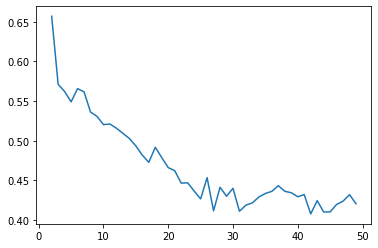

In [77]:
values={}

for i in range(2,50):
    values[i],_=kmeanTest(i,X)
    
aux=list(values.values())
_=plt.plot(list(values.keys()),aux)


print("The best value is",aux.index(min(aux))+2)

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

The best value is 43


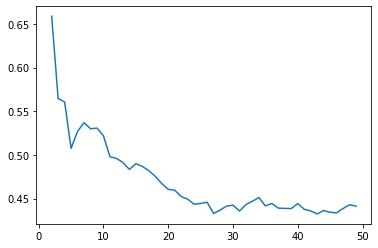

In [78]:
from sklearn.cluster import AgglomerativeClustering

def aggloTest(cluster,X):
    agglo = AgglomerativeClustering(cluster)
    agglo.fit(X)
    silhouette_avg = silhouette_score(X,agglo.labels_)
    return silhouette_avg,agglo.labels_
    
num=8

for i in range(2,50):
    values[i],_=aggloTest(i,X)

aux=list(values.values())
_=plt.plot(list(values.keys()),aux)


print("The best value is",aux.index(min(aux))+2)

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


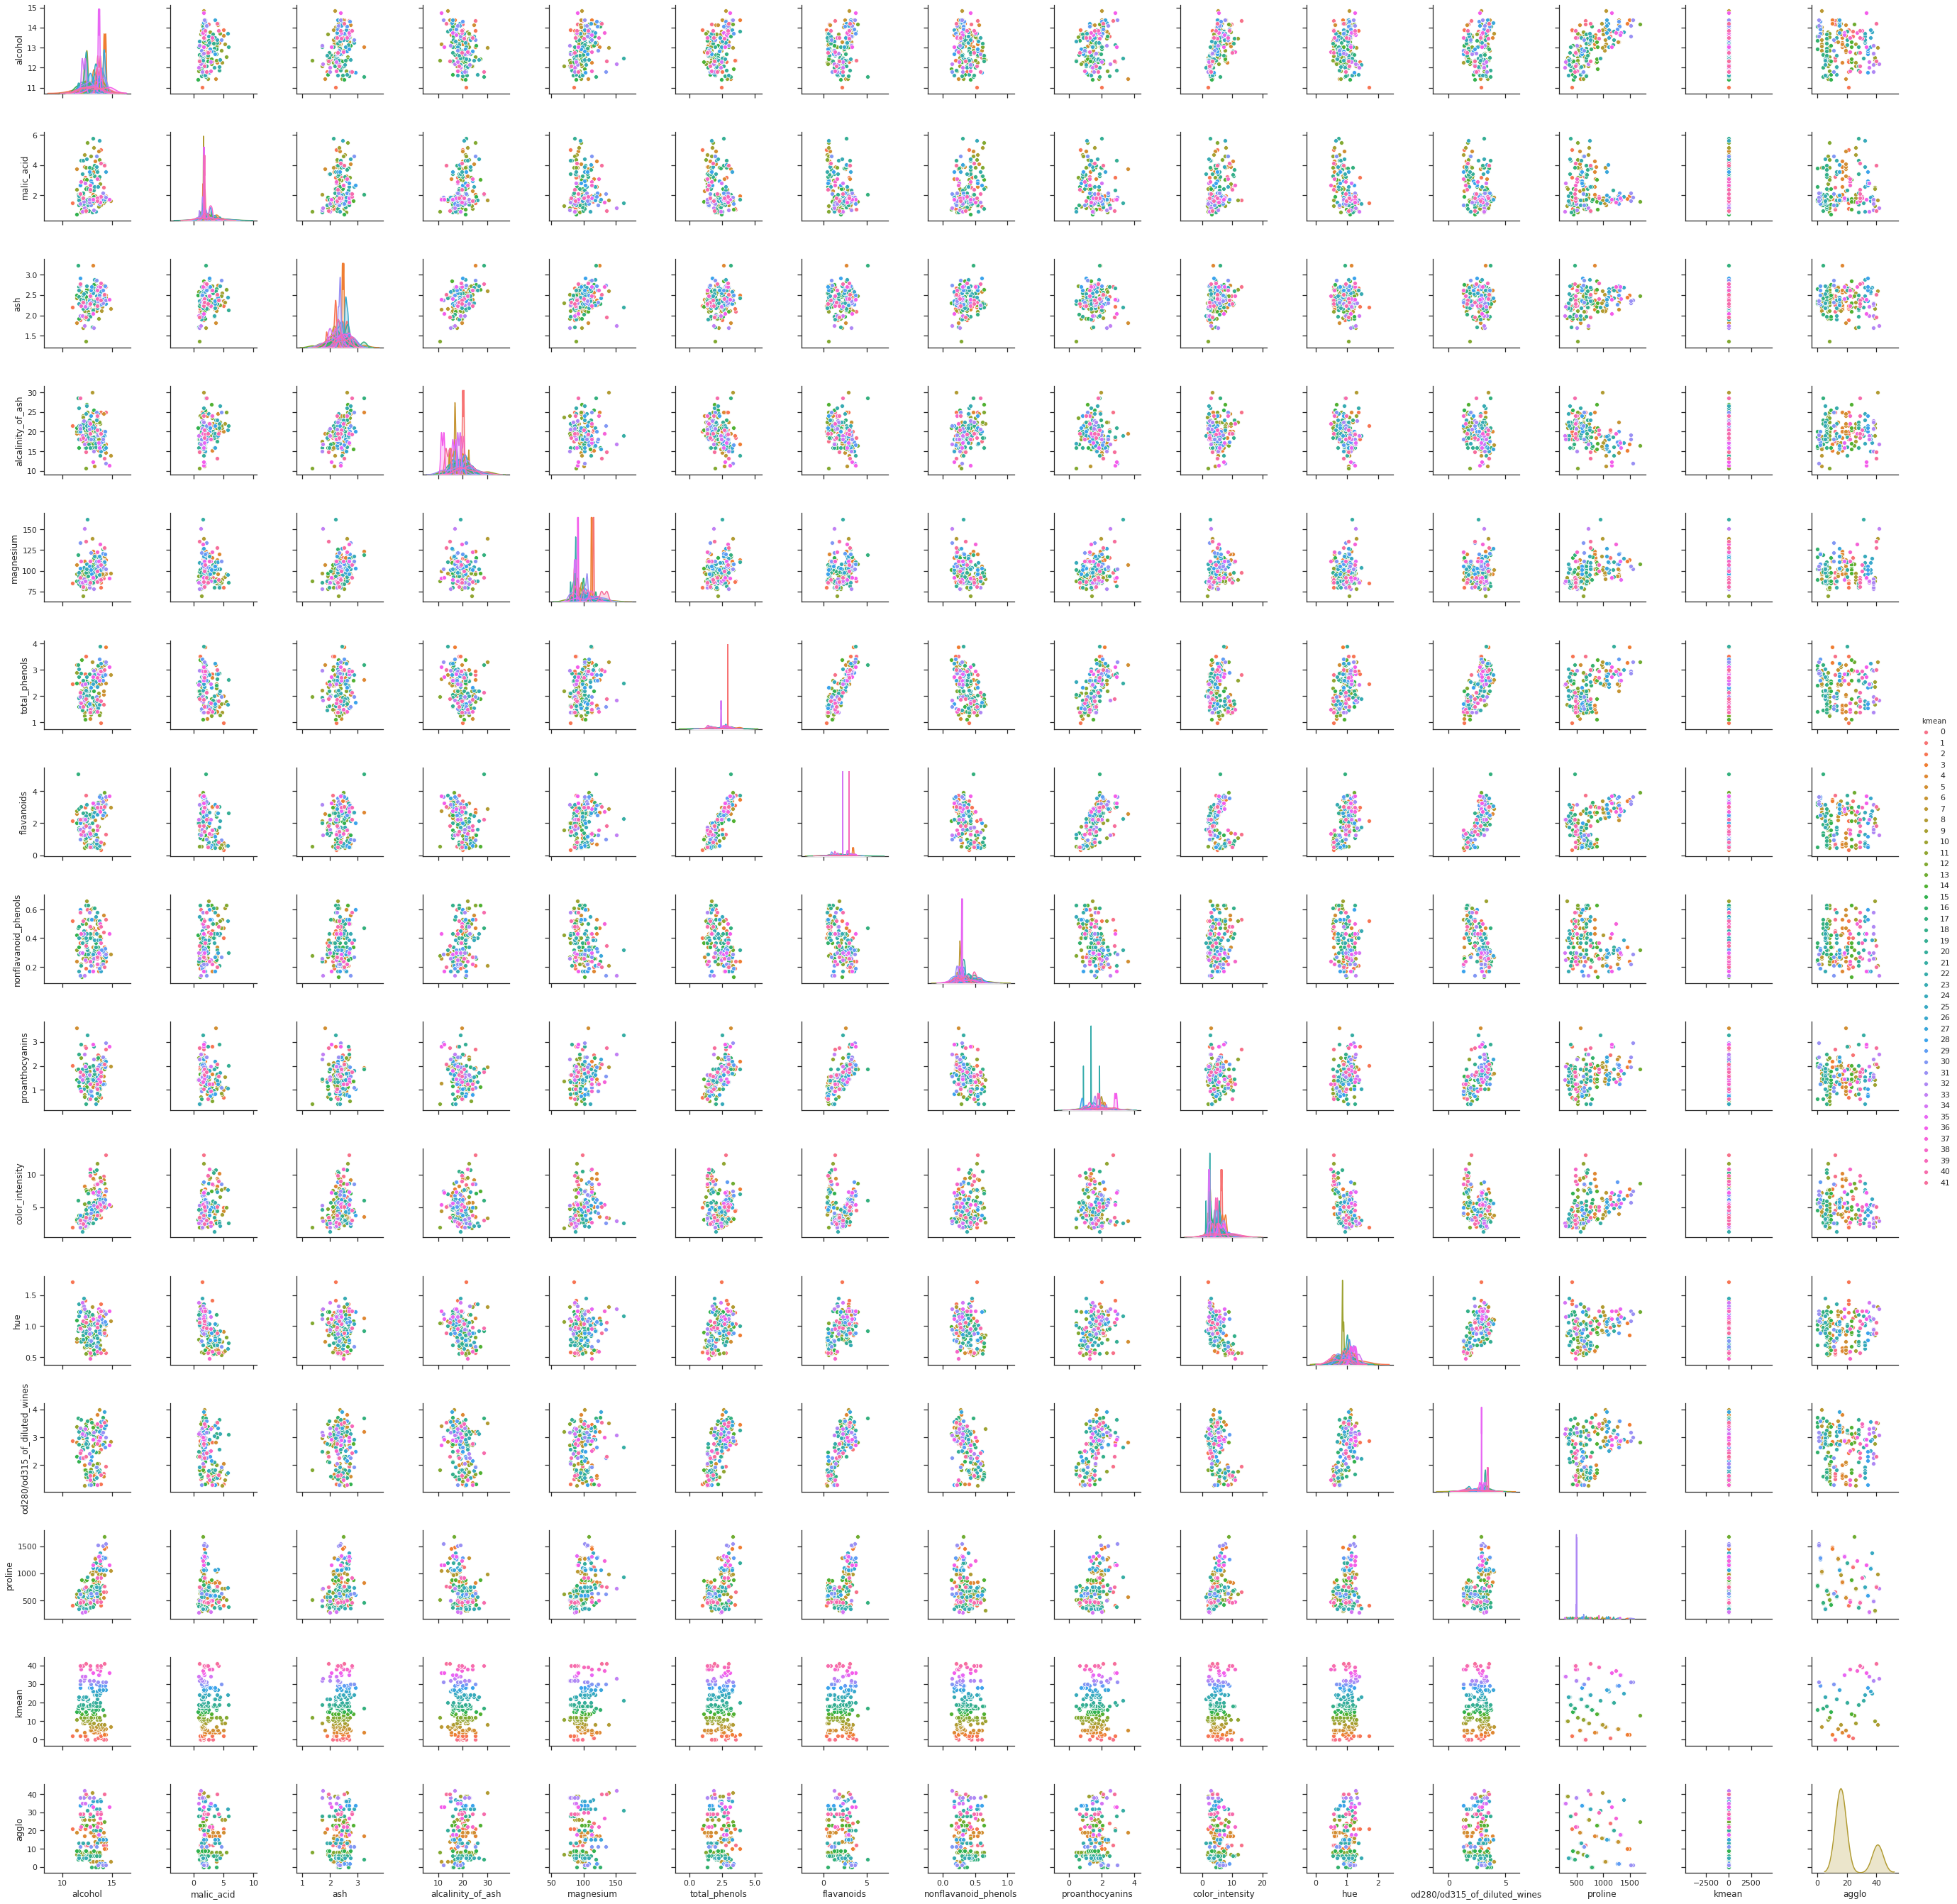

In [81]:
_, kmeanLabels=kmeanTest(42,X)
X_label['kmean']=kmeanLabels

sns.set(style="ticks")
sns.pairplot(X_label, hue="kmean")

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


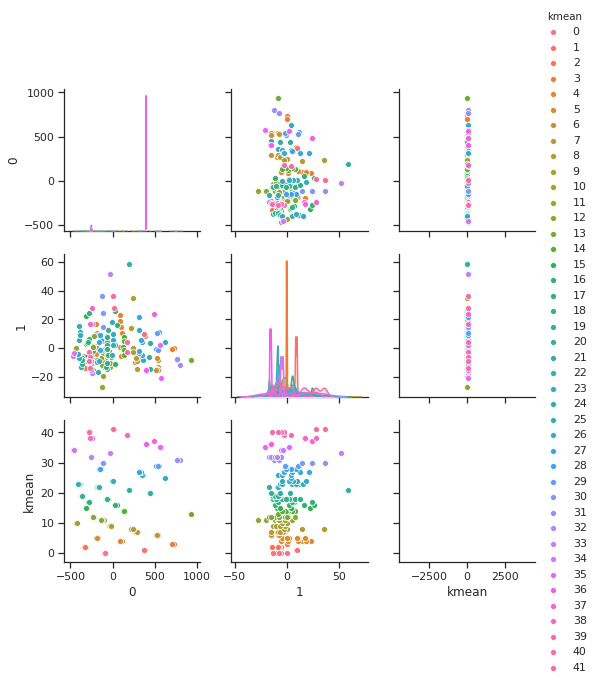

In [95]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)
principalDf['kmean']=kmeanLabels


                 
sns.set(style="ticks")
sns.pairplot(principalDf, hue="kmean")

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 7.647990
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.236671
[t-SNE] KL divergence after 300 iterations: 0.131476


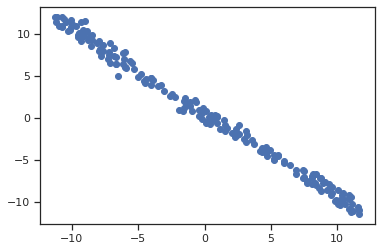

In [110]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)


X['tsne-2d-one'] = tsne_results[:,0]
X['tsne-2d-two'] = tsne_results[:,1]

plt.scatter(tsne_results[:,0], tsne_results[:,1])